In [1]:
import sys
sys.path.append('../')
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.element import Element
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.tools.physicsUnits import GeV

### Create element from old string format

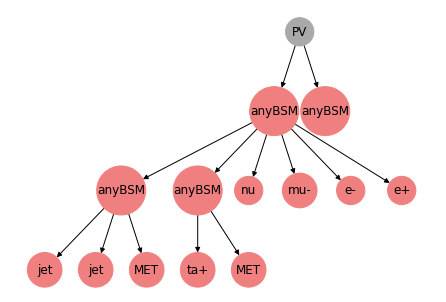

Name= 1101101010101101001101010000 
Process= (PV > anyBSM(1),anyBSM), (anyBSM(1) > anyBSM(2),anyBSM(3),nu,mu-,e-,e+), (anyBSM(2) > jet,jet,MET), (anyBSM(3) > ta+,MET)


In [2]:
elementStr = "[[['e+','e-'],['jet','jet']],[['mu-','nu'],['ta+']]]"
el = Element(info=elementStr)
el.drawTree()
print('Name=',el.getCanonName(),'\nProcess=',el)

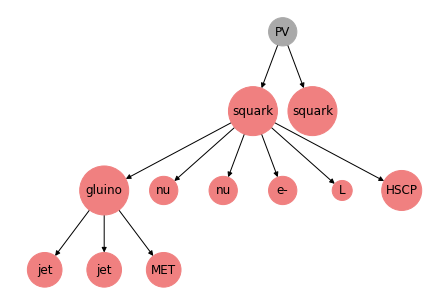

Name= 110110101010101101010000 
Process= (PV > squark(1),squark), (squark(1) > gluino(2),nu,nu,e-,L,HSCP), (gluino(2) > jet,jet,MET)


In [3]:
stringEl = "[ [['e-','nu'], ['jet','jet'] ], [ ['L','nu'] ] ]"
finalStates=['MET','HSCP']
intermediateStates=[['squark','gluino'],['squark']]
el = Element(info=stringEl,finalState=finalStates,intermediateState=intermediateStates)
el.drawTree()
print('Name=',el.getCanonName(),'\nProcess=',el)

### Create element from new string format

In [4]:
elementStr = str(el)
print(elementStr)

(PV > squark(1),squark), (squark(1) > gluino(2),nu,nu,e-,L,HSCP), (gluino(2) > jet,jet,MET)


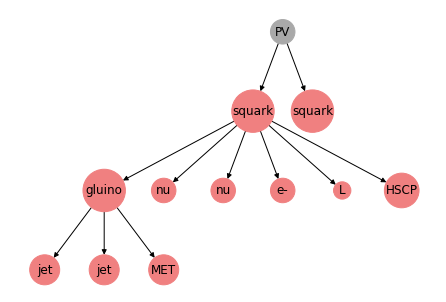

Name= 110110101010101101010000 
Process= (PV > squark(1),squark), (squark(1) > gluino(2),nu,nu,e-,L,HSCP), (gluino(2) > jet,jet,MET)


In [5]:
el = Element(info=elementStr)
el.drawTree(nodeScale=3)
print('Name=',el.getCanonName(),'\nProcess=',el)

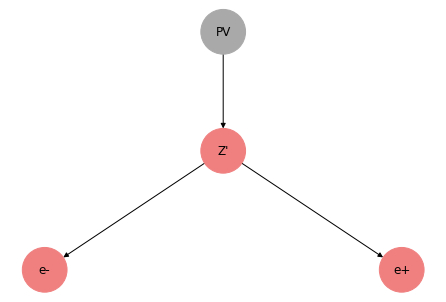

Name= 11101000 
Process= (PV > Z'(1)), (Z'(1) > e-,e+)


In [6]:
elementStr = proc = "(PV > Z'(1)), (Z'(1) > e+, e-)"
el = Element(info=elementStr)
el.drawTree(nodeScale=10)
print('Name=',el.getCanonName(),'\nProcess=',el)

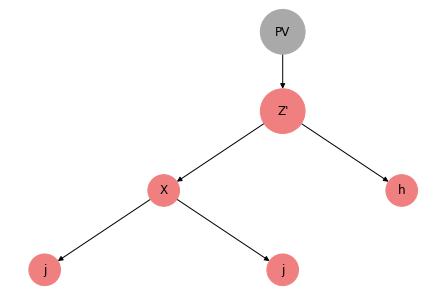

Name= 111011010000 
Process= (PV > Z'(1)), (Z'(1) > X(2),h), (X(2) > j,j)


In [7]:
elementStr = proc = "(PV > Z'(1)), (Z'(1) > X(2), h), (X(2) > j,j)"
el = Element(info=elementStr)
el.drawTree(nodeScale=10)
print('Name=',el.getCanonName(),'\nProcess=',el)

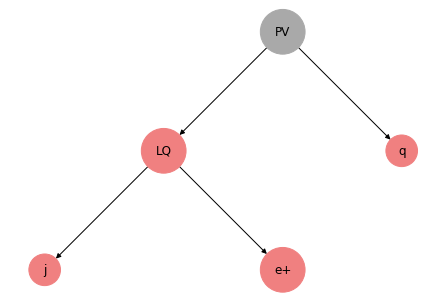

Name= 1101101000 
Process= (PV > LQ(1),q), (LQ(1) > j,e+)


In [8]:
elementStr = proc = "(PV > q,LQ(1)), (LQ(1) > e+, j)"
el = Element(info=elementStr)
el.drawTree(nodeScale=10)
print('Name=',el.getCanonName(),'\nProcess=',el)

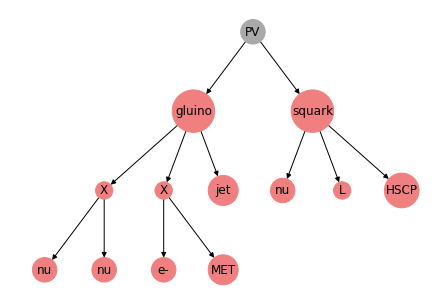

Name= 11101010011011010011010000


In [9]:
elementStr = proc = '(PV > gluino(1),squark(2)), (gluino(1) > X(3),X(4),jet), (squark(2) > HSCP,L,nu), (X(3) > nu,nu), (X(4) > MET,e-)'
el = Element(info=elementStr)
el.drawTree(nodeScale=3)
print('Name=',el.getCanonName())

In [10]:
print(el)

(PV > gluino(1),squark(2)), (gluino(1) > X(3),X(4),jet), (squark(2) > nu,L,HSCP), (X(3) > nu,nu), (X(4) > e-,MET)


### Create element using a model

In [11]:
slhafile = '../inputFiles/slha/lightEWinos.slha'
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile)


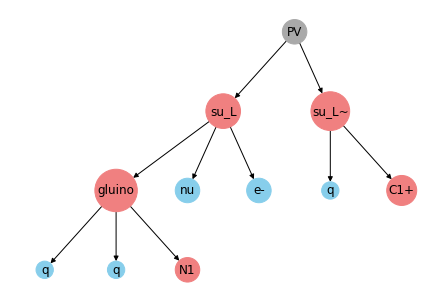

[PV, su_L, gluino, su_L~, q, q, q, nu, e-, C1+, N1]
[(PV, su_L), (PV, su_L~), (su_L, gluino), (su_L, nu), (su_L, e-), (gluino, q), (gluino, q), (gluino, N1), (su_L~, q), (su_L~, C1+)]


In [12]:
stringEl = "(PV > su_L(1),su_L~(2)), (su_L(1) > gluino(3),e-,nu), (su_L~(2) > C1+,d), (gluino(3) > N1,u,u~)"
el = Element(info=stringEl,model=model)
el.drawTree(nodeScale=3)
print(el.tree.nodes)
print(el.tree.edges)

#### Draw tree using distinct property for labels

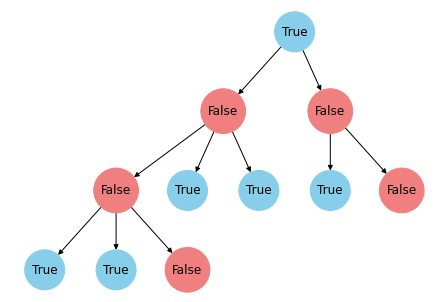

In [13]:
el.drawTree(nodeScale=4,labelAttr='isSM')

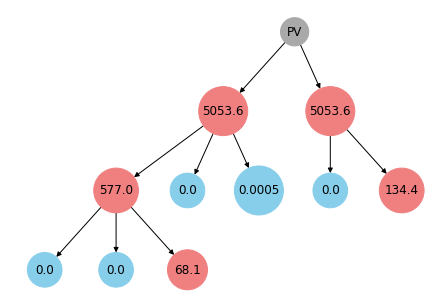

In [14]:
el.drawTree(nodeScale=4,labelAttr='mass',attrUnit=GeV)

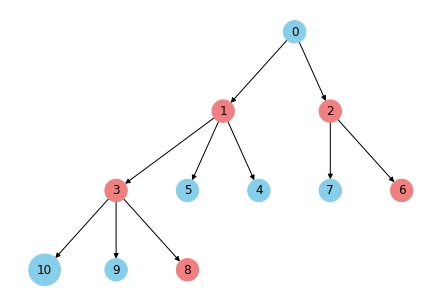

In [15]:
el.drawTree(nodeScale=5,labelAttr='node')

#### Convert to old bracket notation

In [16]:
elB,finalState,intermediateState = el.tree.treeToBrackets()
print(elB)
print(finalState)
print(intermediateState)

[[['nu', 'e-'], ['q', 'q']], [['q']]]
['N1', 'C1+']
[['su_L', 'gluino'], ['su_L~']]


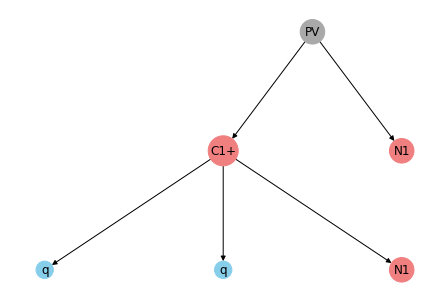

[PV, C1+, q, q, N1, N1]
[(PV, C1+), (PV, N1), (C1+, q), (C1+, q), (C1+, N1)]


In [17]:
stringEl = "(PV > N1,C1+(1)), (C1+(1) > N1,u,d)"
el = Element(info=stringEl,model=model)
el.drawTree(nodeScale=3)
print(el.tree.nodes)
print(el.tree.edges)

In [18]:
elB,finalState,intermediateState = el.tree.treeToBrackets()
print(elB)
print(finalState)
print(intermediateState)

[[['q', 'q']], []]
['N1', 'N1']
[['C1+'], []]


### Get attributes from nodes

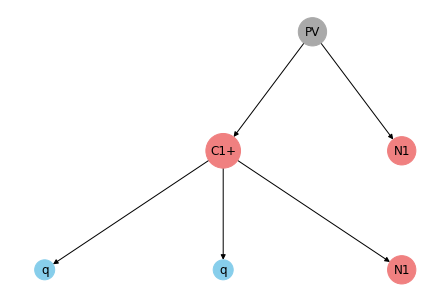

[PV, C1+, q, q, N1, N1]
[(PV, C1+), (PV, N1), (C1+, q), (C1+, q), (C1+, N1)]


In [19]:
el.drawTree()
print(el.tree.nodes)
print(el.tree.edges)

In [20]:
masses = list(zip(el.tree.nodes(),el.mass))
print(masses)

[(PV, None), (C1+, 1.34E+02 [GeV]), (q, 0.00E+00 [MeV]), (q, 0.00E+00 [MeV]), (N1, 6.81E+01 [GeV]), (N1, 6.81E+01 [GeV])]


In [21]:
pdgs = list(zip(el.tree.nodes(),el.pdg))
print(pdgs)

[(PV, None), (C1+, 1000024), (q, [-2, 1, 3, -1, -3, 2]), (q, [-2, 1, 3, -1, -3, 2]), (N1, 1000022), (N1, 1000022)]


In [22]:
Z2parity = list(zip(el.tree.nodes(),el.isSM))
print(Z2parity)

[(PV, None), (C1+, False), (q, True), (q, True), (N1, False), (N1, False)]


In [23]:
# Final states:
print(el.getFinalStates())

[q, q, N1, N1]
